In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset , TensorDataset
from torchvision import transforms
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import scipy.stats as stats

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report



import warnings
warnings.filterwarnings("ignore")


In [2]:
cancer_data = load_breast_cancer()
data = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
data['target'] = cancer_data.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
renamed_columns = [i.replace(" ", "_")for i in data.columns]
data.rename(dict(zip(list(data.columns) , renamed_columns )) ,axis = 1, inplace = True)
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
data.shape

(569, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [6]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
def return_null_value_summary(data):
    return data.isnull().sum().to_dict()
return_null_value_summary(data)

{'mean_radius': 0,
 'mean_texture': 0,
 'mean_perimeter': 0,
 'mean_area': 0,
 'mean_smoothness': 0,
 'mean_compactness': 0,
 'mean_concavity': 0,
 'mean_concave_points': 0,
 'mean_symmetry': 0,
 'mean_fractal_dimension': 0,
 'radius_error': 0,
 'texture_error': 0,
 'perimeter_error': 0,
 'area_error': 0,
 'smoothness_error': 0,
 'compactness_error': 0,
 'concavity_error': 0,
 'concave_points_error': 0,
 'symmetry_error': 0,
 'fractal_dimension_error': 0,
 'worst_radius': 0,
 'worst_texture': 0,
 'worst_perimeter': 0,
 'worst_area': 0,
 'worst_smoothness': 0,
 'worst_compactness': 0,
 'worst_concavity': 0,
 'worst_concave_points': 0,
 'worst_symmetry': 0,
 'worst_fractal_dimension': 0,
 'target': 0}

In [8]:
data['diagnosis'] = data['target'].apply(lambda x: 'M' if x == 1 else 'B')

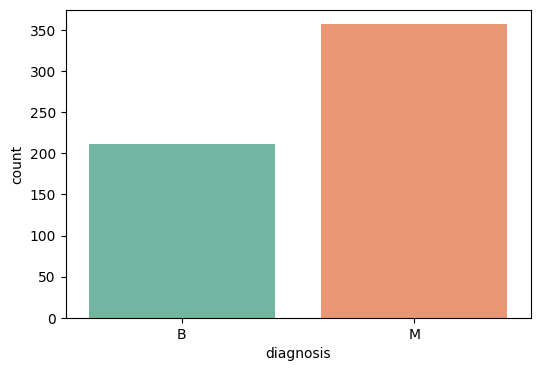

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x=data["diagnosis"], palette="Set2" )
plt.show()

In [10]:
test_normality = lambda x: stats.shapiro(data.drop(['diagnosis', 'target'] , axis = 1))[1] < 0.01
normal = pd.DataFrame(data)
normal = normal.apply(test_normality)
print(not normal.any())

False


In [11]:

mean_columns = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension']

error_columns = ['radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error']

worst_columns = ['worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']

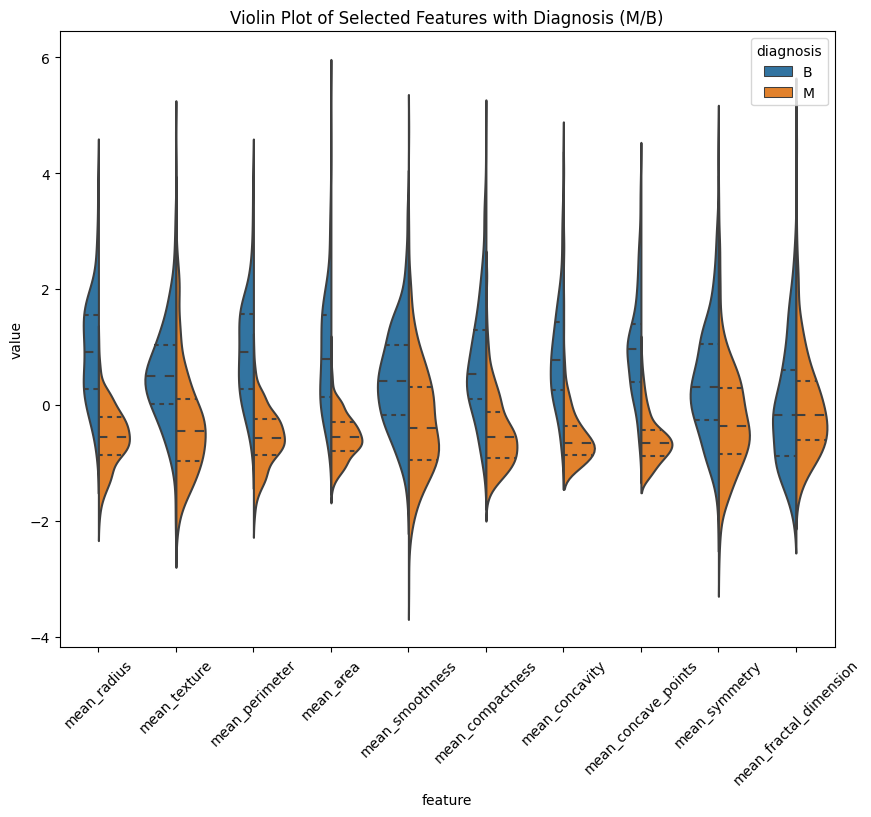

In [12]:
plot_data = data[mean_columns].apply(lambda x: (x - x.mean()) / x.std())
plot_data = pd.concat([data['diagnosis'], plot_data], axis=1)
plot_data_melted = plot_data.melt(id_vars='diagnosis', var_name='feature', value_name='value')
plt.figure(figsize=(10, 8))
sns.violinplot(x='feature', y='value', hue='diagnosis', data=plot_data_melted, split=True, inner='quart')
plt.title('Violin Plot of Selected Features with Diagnosis (M/B)')
plt.xticks(rotation=45)
plt.show()



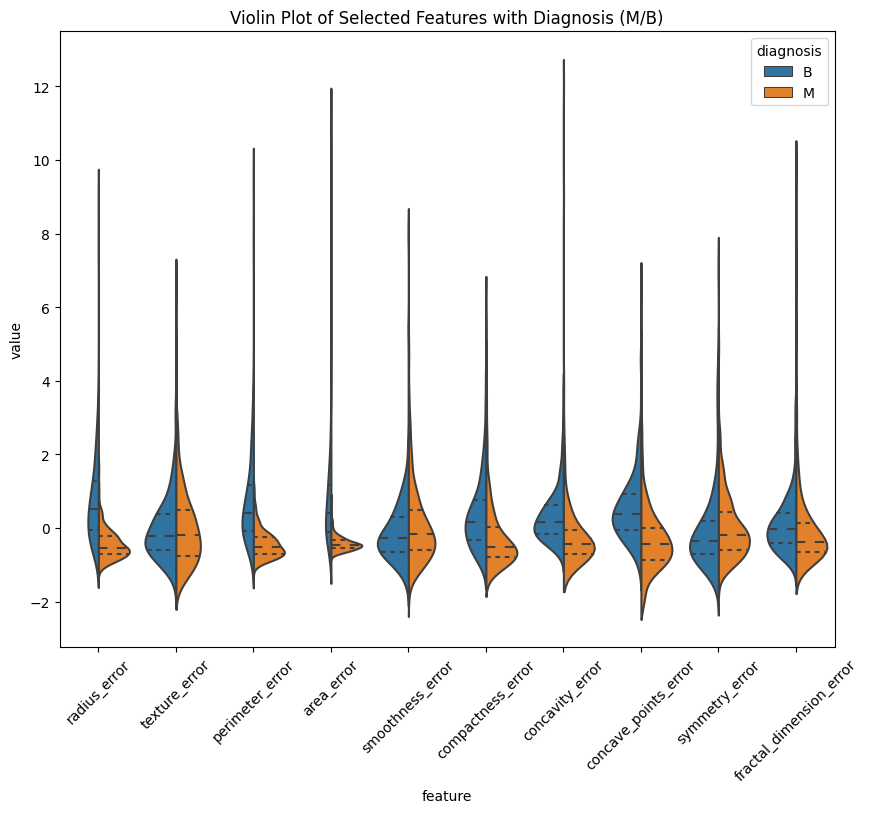

In [13]:
plot_data = data[error_columns].apply(lambda x: (x - x.mean()) / x.std())
plot_data = pd.concat([data['diagnosis'], plot_data], axis=1)
plot_data_melted = plot_data.melt(id_vars='diagnosis', var_name='feature', value_name='value')
plt.figure(figsize=(10, 8))
sns.violinplot(x='feature', y='value', hue='diagnosis', data=plot_data_melted, split=True, inner='quart')
plt.title('Violin Plot of Selected Features with Diagnosis (M/B)')
plt.xticks(rotation=45)
plt.show()



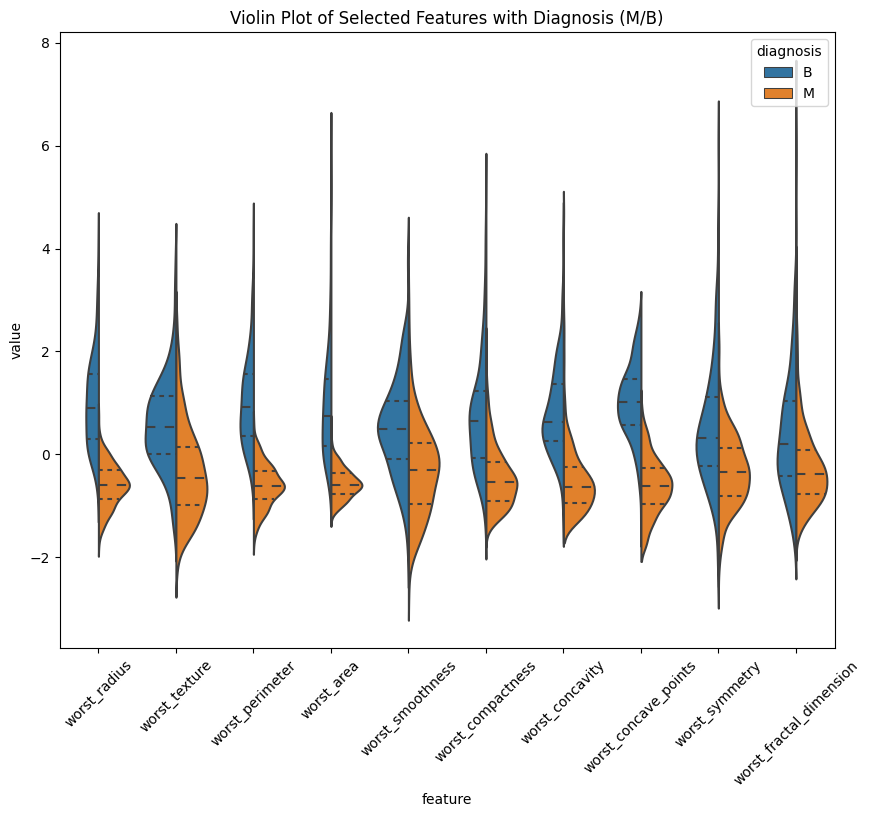

In [14]:

plot_data = data[worst_columns].apply(lambda x: (x - x.mean()) / x.std())
plot_data = pd.concat([data['diagnosis'], plot_data], axis=1)
plot_data_melted = plot_data.melt(id_vars='diagnosis', var_name='feature', value_name='value')
plt.figure(figsize=(10, 8))
sns.violinplot(x='feature', y='value', hue='diagnosis', data=plot_data_melted, split=True, inner='quart')
plt.title('Violin Plot of Selected Features with Diagnosis (M/B)')
plt.xticks(rotation=45)
plt.show()



In [15]:
final_columns = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_compactness', 'mean_concavity', 'mean_concave_points', 'radius_error',
                'perimeter_error', 'area_error', 'compactness_error', 'concavity_error','concave_points_error', 'worst_radius', 'worst_texture',
                 'worst_perimeter', 'worst_area','worst_compactness', 'worst_concavity', 'worst_concave_points']

# The above columns are derived from based on median difference in each feature in violin plots

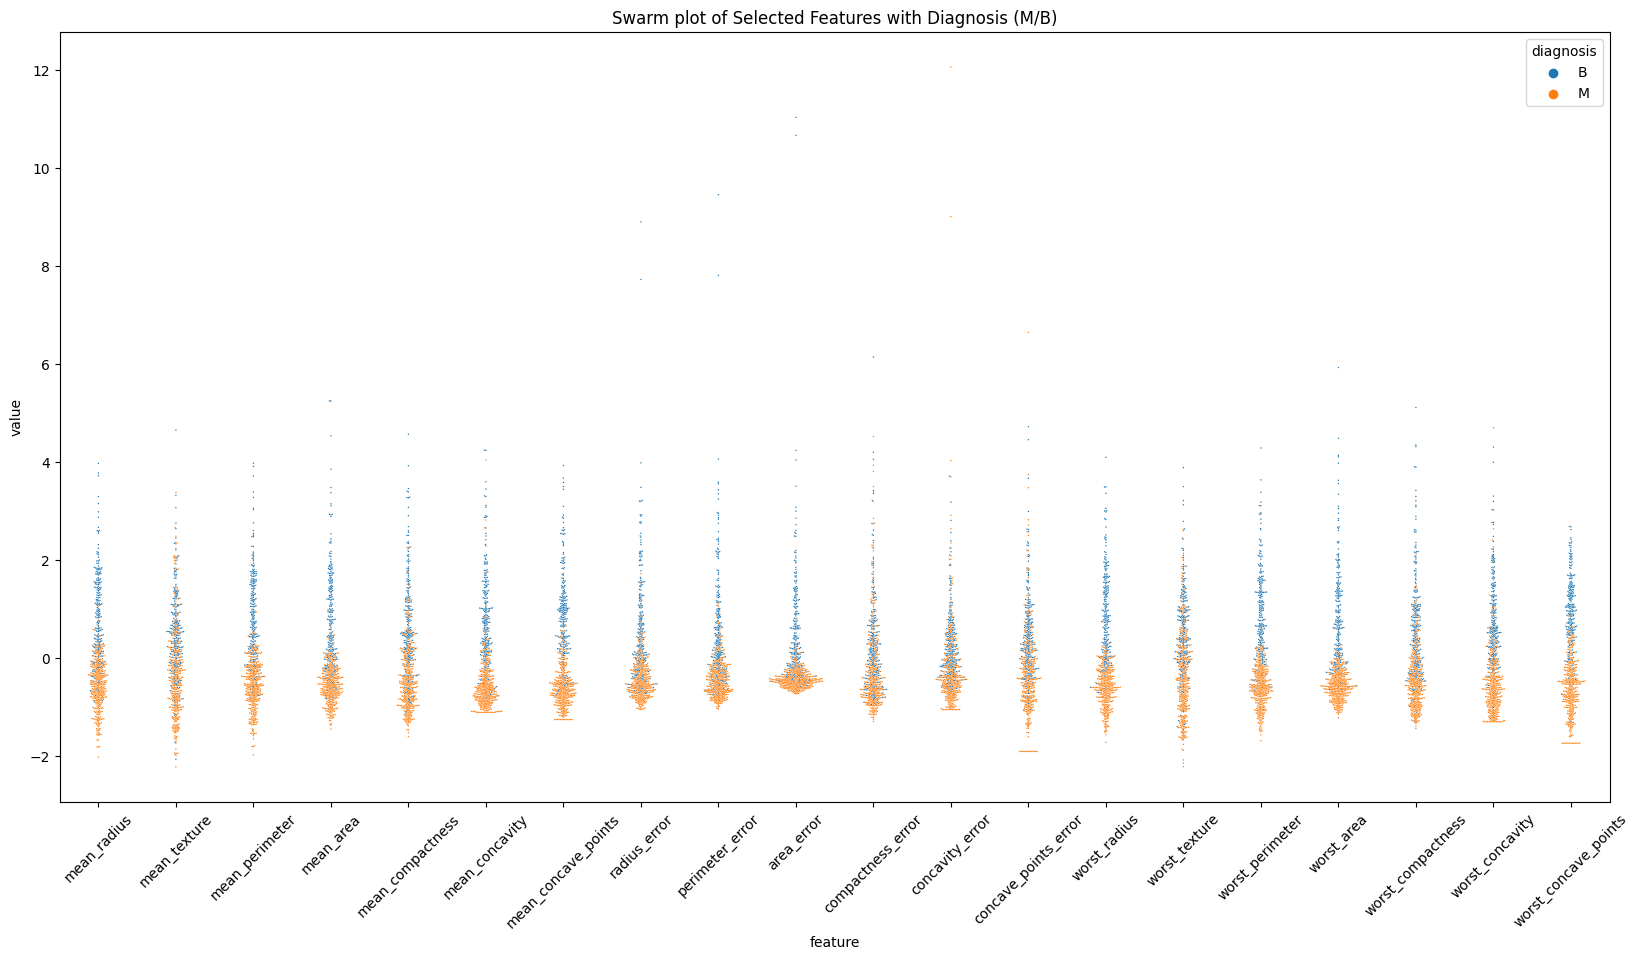

In [16]:
plot_data = data[final_columns].apply(lambda x: (x - x.mean()) / x.std())
plot_data = pd.concat([data['diagnosis'], plot_data], axis=1)
plot_data_melted = plot_data.melt(id_vars='diagnosis', var_name='feature', value_name='value')
plt.figure(figsize=(20 ,10))
sns.swarmplot(x='feature', y='value', hue='diagnosis', data= plot_data_melted, size=1)
plt.title('Swarm plot of Selected Features with Diagnosis (M/B)')
plt.xticks(rotation=45)
plt.show()

In [17]:
swarpplot_unwanted  = ['mean_texture' , 'compactness_error' , 'concavity_error' , 'concave_point_error' , 'worst_texture' , 'worst_compactness' , 'worst_concavity' ]
possible_features = list(filter(lambda x: x not in swarpplot_unwanted, final_columns))
possible_features.append('target')
print((possible_features))

['mean_radius', 'mean_perimeter', 'mean_area', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'radius_error', 'perimeter_error', 'area_error', 'concave_points_error', 'worst_radius', 'worst_perimeter', 'worst_area', 'worst_concave_points', 'target']


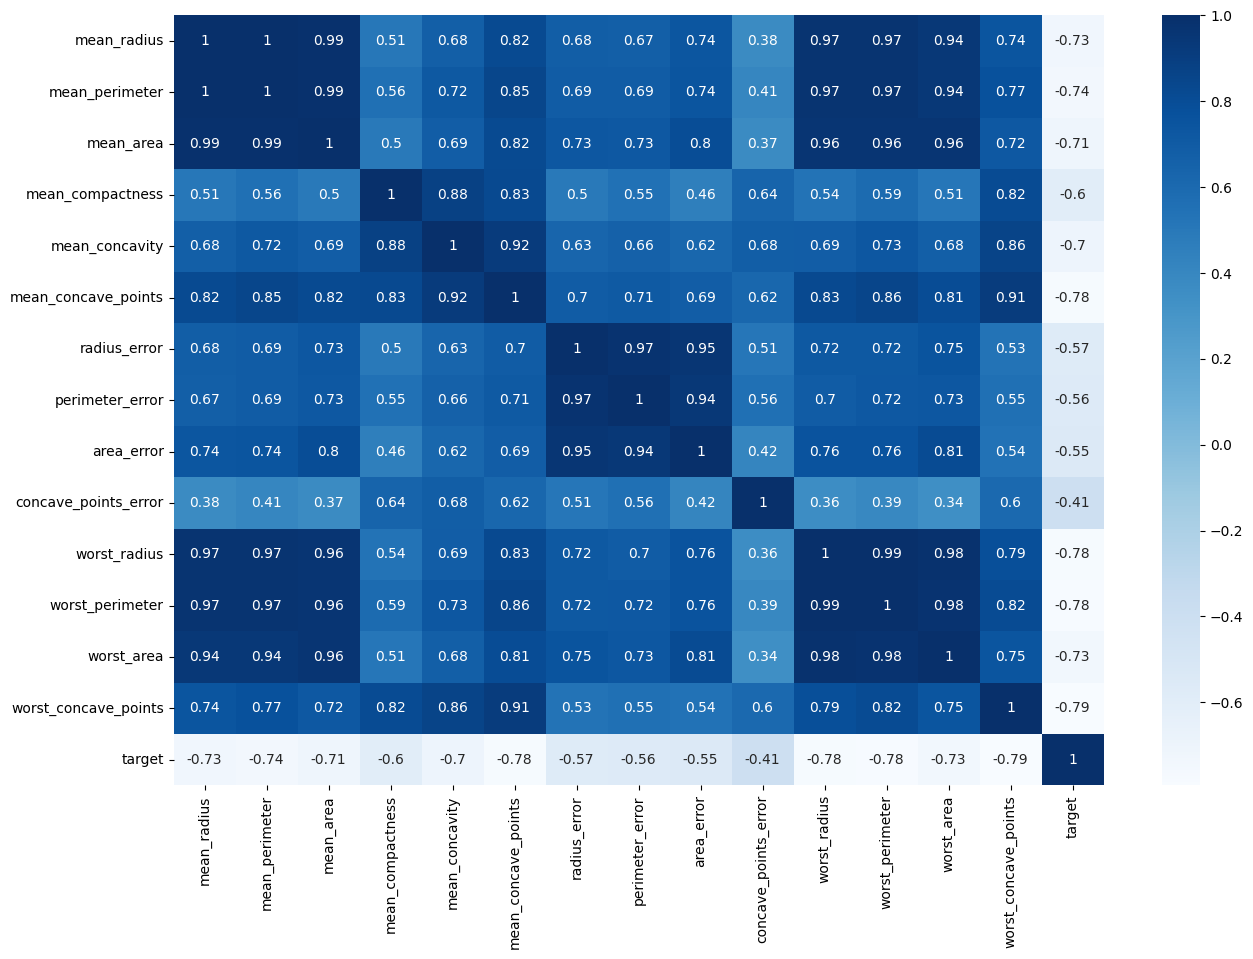

In [18]:

correlation_matrix = data[possible_features].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

In [19]:
data = data[possible_features]


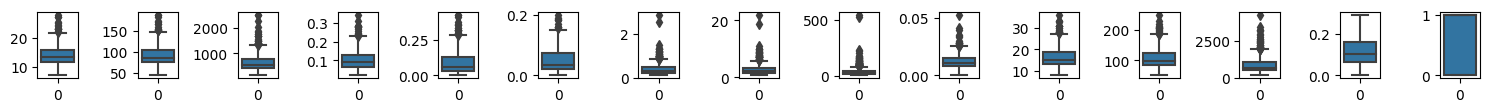

In [20]:
l = data.columns.values
number_of_columns=data.shape[1]
number_of_rows = data.shape[0]
plt.figure(figsize=(len(possible_features), 600))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.boxplot(data[l[i]])
    plt.tight_layout()

In [21]:

def replace_outliers_with_mean(data):
  for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: data[column].mean() if x < lower_bound or x > upper_bound else x)
  return data

data = replace_outliers_with_mean(data)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['target'] , axis = 1), cancer_data.target, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = torch.FloatTensor(scaler.fit_transform(X_train))
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(scaler.transform(X_test))
y_test = torch.LongTensor(y_test)

In [24]:
def generateDataLoader(feature , target , shuffle=True):
  dataset = TensorDataset(feature, target)
  data_loader = DataLoader(dataset, batch_size=1, shuffle=shuffle)
  return dataset , data_loader

train_dataset , train_loader = generateDataLoader(X_train, y_train)
test_dataset , test_loader = generateDataLoader(X_test, y_test)

In [25]:

class MyModel(nn.Module):
    def __init__(self, input_size):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        # self.dropout = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(64, 2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        # x = self.dropout(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [26]:

def execute_model(optimizer , learning_rate , epoch = 100 ):
  pytorch_model = MyModel(X_train.shape[1])
  optimizer = optimizer(pytorch_model.parameters(), lr= learning_rate )
  criterion = nn.CrossEntropyLoss()
  num_epochs = epoch

  train_loss = []
  train_accuracy = []
  validation_loss = []
  validation_accuracy = []



  for epoch in range(num_epochs):
      pytorch_model.train()
      epoch_loss = 0.0
      correct_predictions = 0

      for inputs, labels in train_loader:
          optimizer.zero_grad()
          outputs = pytorch_model(inputs)
          outputs = outputs.squeeze(dim=1)

          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          epoch_loss += loss.item()
          _, predicted = torch.max(outputs, 1)
          correct_predictions += (predicted == labels).sum().item()

      average_epoch_loss = epoch_loss / len(train_loader)
      accuracy = correct_predictions / len(train_loader.dataset)


      pytorch_model.eval()
      val_loss = 0.0
      val_correct_predictions = 0

      with torch.no_grad():
          for val_inputs, val_labels in test_loader:
              val_outputs = pytorch_model(val_inputs)
              val_loss += criterion(val_outputs, val_labels).item()

              _, val_predicted = torch.max(val_outputs, 1)
              val_correct_predictions += (val_predicted == val_labels).sum().item()

      average_val_loss = val_loss / len(test_loader)
      val_accuracy = val_correct_predictions / len(test_loader.dataset)

      train_loss.append(float("{:.4f}".format(average_epoch_loss)))
      train_accuracy.append(float("{:.2f}".format(accuracy * 100)))
      validation_loss.append(float("{:.4f}".format(average_val_loss)))
      validation_accuracy.append(float("{:.2f}".format(val_accuracy * 100)))


      print(f"Epoch {epoch + 1}/{num_epochs}, "
            f"Train Loss: {average_epoch_loss:.4f}, Train Accuracy: {accuracy * 100:.2f}%, "
            f"Val Loss: {average_val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")




  return train_loss , train_accuracy , validation_loss , validation_accuracy , pytorch_model



In [27]:
def plot_graphs(train_loss , validation_loss , train_accuracy , validation_accuracy , optimizer , lr):

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    ax1 = axes[0]
    ax1.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    ax1.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')

    ax1.set_title(f'Training and Validation Loss for {optimizer} with learning rate {lr} ' )
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2 = axes[1]
    ax2.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
    ax2.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')

    ax2.set_title(f'Training and Validation Accuracy for {optimizer} with learning rate {lr}')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [28]:
final_accuracy , final_models = {} , {}

In [29]:
train_loss , train_accuracy , validation_loss , validation_accuracy , adam_0001 = execute_model(optim.Adam , 0.001 )

Epoch 1/100, Train Loss: 0.4176, Train Accuracy: 92.09%, Val Loss: 0.3355, Val Accuracy: 98.25%
Epoch 2/100, Train Loss: 0.3687, Train Accuracy: 93.85%, Val Loss: 0.3340, Val Accuracy: 98.25%
Epoch 3/100, Train Loss: 0.3597, Train Accuracy: 94.95%, Val Loss: 0.3299, Val Accuracy: 98.25%
Epoch 4/100, Train Loss: 0.3530, Train Accuracy: 95.82%, Val Loss: 0.3317, Val Accuracy: 98.25%
Epoch 5/100, Train Loss: 0.3509, Train Accuracy: 96.26%, Val Loss: 0.3275, Val Accuracy: 99.12%
Epoch 6/100, Train Loss: 0.3426, Train Accuracy: 97.14%, Val Loss: 0.3278, Val Accuracy: 99.12%
Epoch 7/100, Train Loss: 0.3464, Train Accuracy: 96.48%, Val Loss: 0.3306, Val Accuracy: 98.25%
Epoch 8/100, Train Loss: 0.3425, Train Accuracy: 97.14%, Val Loss: 0.3259, Val Accuracy: 99.12%
Epoch 9/100, Train Loss: 0.3402, Train Accuracy: 97.58%, Val Loss: 0.3279, Val Accuracy: 98.25%
Epoch 10/100, Train Loss: 0.3405, Train Accuracy: 97.80%, Val Loss: 0.3297, Val Accuracy: 98.25%
Epoch 11/100, Train Loss: 0.3385, Train

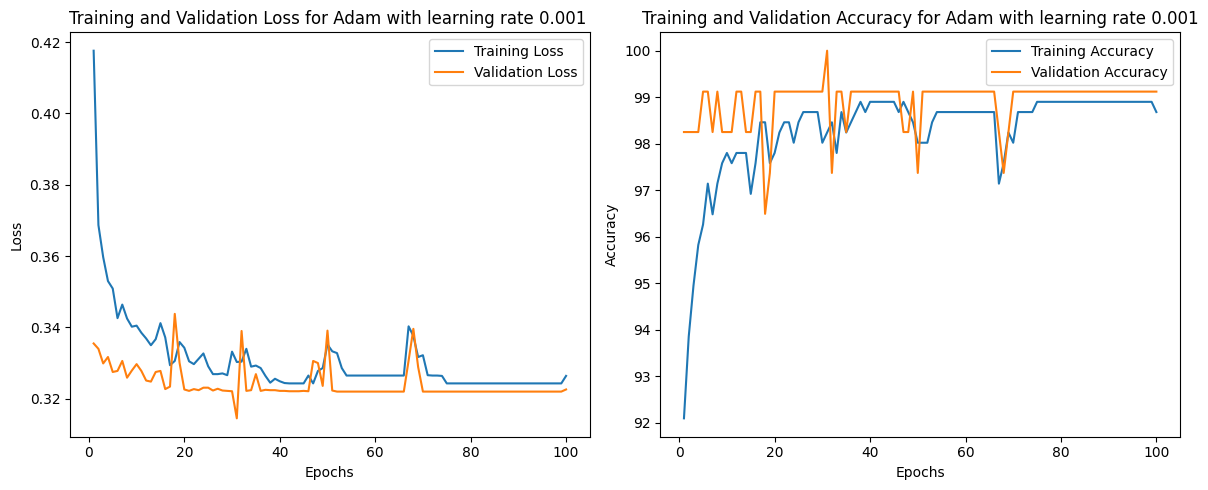

In [30]:
final_accuracy["Adam_0.001"] = train_accuracy[-1]
final_models["Adam_0.001"] = adam_0001
plot_graphs(train_loss , validation_loss , train_accuracy , validation_accuracy , 'Adam' , 0.001)


In [31]:
train_loss , train_accuracy , validation_loss , validation_accuracy , adam_01 = execute_model(optim.Adam , 0.1)

Epoch 1/100, Train Loss: 0.9341, Train Accuracy: 37.58%, Val Loss: 0.9361, Val Accuracy: 37.72%
Epoch 2/100, Train Loss: 0.9418, Train Accuracy: 37.14%, Val Loss: 0.9361, Val Accuracy: 37.72%
Epoch 3/100, Train Loss: 0.9418, Train Accuracy: 37.14%, Val Loss: 0.9361, Val Accuracy: 37.72%
Epoch 4/100, Train Loss: 0.9418, Train Accuracy: 37.14%, Val Loss: 0.9361, Val Accuracy: 37.72%
Epoch 5/100, Train Loss: 0.9418, Train Accuracy: 37.14%, Val Loss: 0.9361, Val Accuracy: 37.72%
Epoch 6/100, Train Loss: 0.9418, Train Accuracy: 37.14%, Val Loss: 0.9361, Val Accuracy: 37.72%
Epoch 7/100, Train Loss: 0.9418, Train Accuracy: 37.14%, Val Loss: 0.9361, Val Accuracy: 37.72%
Epoch 8/100, Train Loss: 0.9418, Train Accuracy: 37.14%, Val Loss: 0.9361, Val Accuracy: 37.72%
Epoch 9/100, Train Loss: 0.9418, Train Accuracy: 37.14%, Val Loss: 0.9361, Val Accuracy: 37.72%
Epoch 10/100, Train Loss: 0.9418, Train Accuracy: 37.14%, Val Loss: 0.9361, Val Accuracy: 37.72%
Epoch 11/100, Train Loss: 0.9418, Train

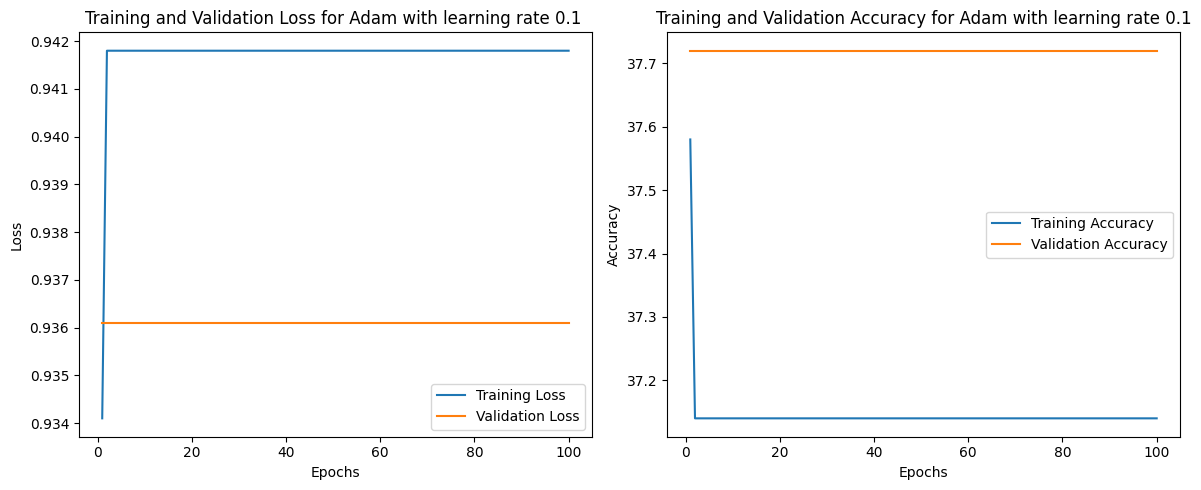

In [32]:
final_accuracy["Adam_0.1"] = train_accuracy[-1]
final_models["Adam_0.1"] = adam_01
plot_graphs(train_loss , validation_loss , train_accuracy , validation_accuracy , 'Adam' , 0.1)


In [33]:
train_loss , train_accuracy , validation_loss , validation_accuracy , sgd_0001 = execute_model(optim.SGD , 0.001)

Epoch 1/100, Train Loss: 0.6792, Train Accuracy: 63.08%, Val Loss: 0.6724, Val Accuracy: 64.04%
Epoch 2/100, Train Loss: 0.6653, Train Accuracy: 77.14%, Val Loss: 0.6568, Val Accuracy: 85.96%
Epoch 3/100, Train Loss: 0.6503, Train Accuracy: 87.47%, Val Loss: 0.6396, Val Accuracy: 91.23%
Epoch 4/100, Train Loss: 0.6335, Train Accuracy: 89.67%, Val Loss: 0.6204, Val Accuracy: 94.74%
Epoch 5/100, Train Loss: 0.6149, Train Accuracy: 90.77%, Val Loss: 0.5990, Val Accuracy: 96.49%
Epoch 6/100, Train Loss: 0.5943, Train Accuracy: 91.43%, Val Loss: 0.5757, Val Accuracy: 96.49%
Epoch 7/100, Train Loss: 0.5725, Train Accuracy: 91.87%, Val Loss: 0.5513, Val Accuracy: 96.49%
Epoch 8/100, Train Loss: 0.5503, Train Accuracy: 92.75%, Val Loss: 0.5271, Val Accuracy: 96.49%
Epoch 9/100, Train Loss: 0.5289, Train Accuracy: 92.75%, Val Loss: 0.5042, Val Accuracy: 96.49%
Epoch 10/100, Train Loss: 0.5093, Train Accuracy: 92.53%, Val Loss: 0.4837, Val Accuracy: 95.61%
Epoch 11/100, Train Loss: 0.4921, Train

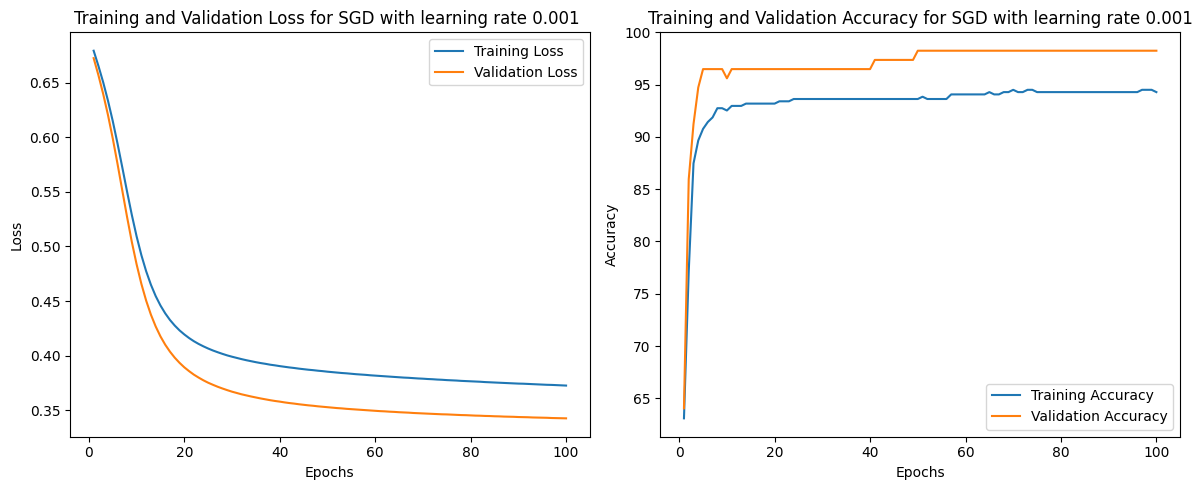

In [34]:

final_accuracy["SGD_0.001"] =  train_accuracy[-1]
final_models["SGD_0.001"] = sgd_0001
plot_graphs(train_loss , validation_loss , train_accuracy , validation_accuracy , 'SGD' , 0.001)



In [35]:

train_loss , train_accuracy , validation_loss , validation_accuracy , sgd_01 = execute_model(optim.SGD , 0.1)

Epoch 1/100, Train Loss: 0.4191, Train Accuracy: 91.65%, Val Loss: 0.3410, Val Accuracy: 97.37%
Epoch 2/100, Train Loss: 0.3709, Train Accuracy: 93.85%, Val Loss: 0.3425, Val Accuracy: 97.37%
Epoch 3/100, Train Loss: 0.3583, Train Accuracy: 95.82%, Val Loss: 0.3326, Val Accuracy: 98.25%
Epoch 4/100, Train Loss: 0.3544, Train Accuracy: 95.60%, Val Loss: 0.3430, Val Accuracy: 97.37%
Epoch 5/100, Train Loss: 0.3479, Train Accuracy: 96.92%, Val Loss: 0.3372, Val Accuracy: 96.49%
Epoch 6/100, Train Loss: 0.3543, Train Accuracy: 94.95%, Val Loss: 0.3354, Val Accuracy: 97.37%
Epoch 7/100, Train Loss: 0.3508, Train Accuracy: 95.82%, Val Loss: 0.3294, Val Accuracy: 98.25%
Epoch 8/100, Train Loss: 0.3481, Train Accuracy: 96.26%, Val Loss: 0.3267, Val Accuracy: 99.12%
Epoch 9/100, Train Loss: 0.3459, Train Accuracy: 97.14%, Val Loss: 0.3297, Val Accuracy: 98.25%
Epoch 10/100, Train Loss: 0.3439, Train Accuracy: 96.92%, Val Loss: 0.3262, Val Accuracy: 99.12%
Epoch 11/100, Train Loss: 0.3421, Train

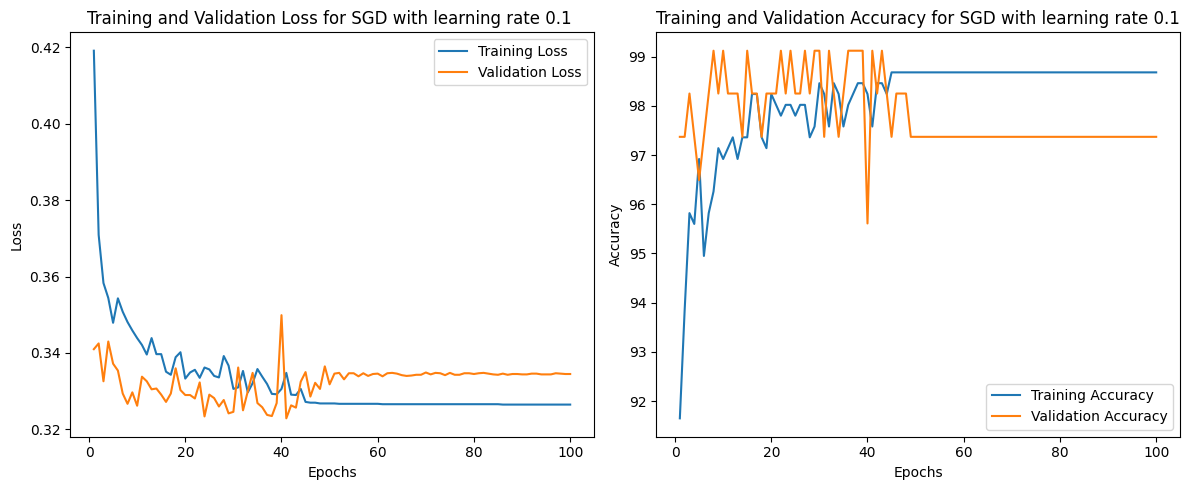

In [36]:
final_accuracy["SGD_0.1"] = train_accuracy[-1]
final_models["SGD_0.1"] = sgd_01
plot_graphs(train_loss , validation_loss , train_accuracy , validation_accuracy , 'SGD' , 0.1)


In [37]:
final_accuracy

{'Adam_0.001': 98.68, 'Adam_0.1': 37.14, 'SGD_0.001': 94.29, 'SGD_0.1': 98.68}

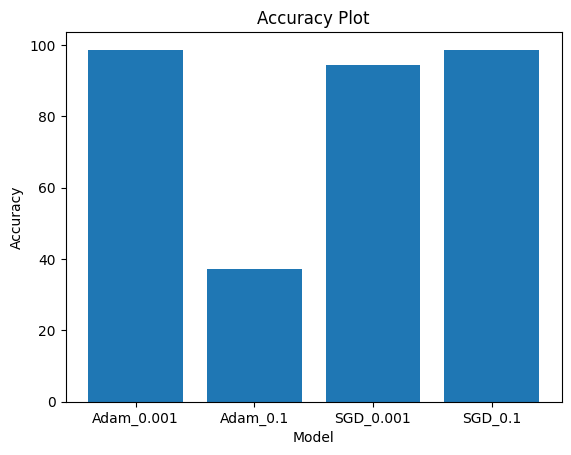

In [38]:

plt.bar(final_accuracy.keys(), final_accuracy.values())
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [39]:
best_model = max(final_accuracy, key=lambda k: final_accuracy[k])
best_model = final_models[best_model]

In [40]:
test = []
predicted = []
with torch.no_grad():
  for val_inputs, val_labels in test_loader:
    val_outputs = best_model(val_inputs)
    _, val_predicted = torch.max(val_outputs, 1)
    test.append(val_labels)
    predicted.append(val_predicted)

test = [int(tensor.item()) for tensor in test]
predicted = [int(tensor.item()) for tensor in predicted]

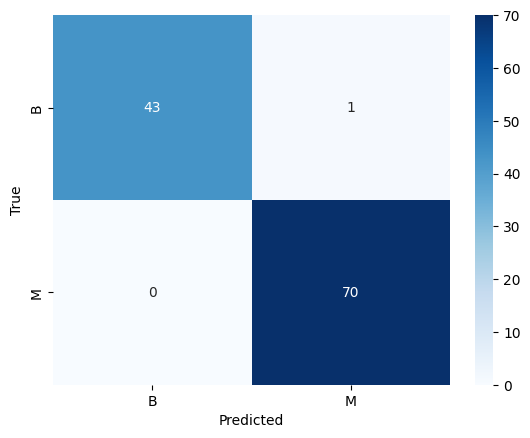

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(predicted_values , test_values  ):
  conf_matrix = confusion_matrix(predicted_values , test_values)
  sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['B' , 'M' ], yticklabels=[ 'B' , 'M'])
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

plot_confusion_matrix(predicted , test  )